## Importing Libraries

In [1]:
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from termcolor import colored
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

#Classifiers
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# from sklearn.svm import SVC

## Importing Dataset

In [2]:
train_set_path = '/kaggle/input/ag-news-sinhala/ag_news_sinhala/train.csv'
test_set_path = '/kaggle/input/ag-news-sinhala/ag_news_sinhala/test.csv'

In [3]:
train_set = pd.read_csv(train_set_path)
test_set = pd.read_csv(test_set_path)

In [4]:
# Concatenate train and test data
df = pd.concat([train_set, test_set], ignore_index=True)

# Save the combined data to a new CSV file
df.to_csv('combined.csv', index=False)

In [5]:
df.head()

,Unnamed: 0,Class Index,Title (English),Description (English),Title (Sinhala),Description (Sinhala)
0,0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",වෝල් වීදිය නැවතත් ධනාත්මක ආර්ථිකයක් ලබා ගත්තේය.,"නිව් යෝර්ක් (රොයිටර්) - කෙටි විකුණුම්කරුවන්, ව..."
1,1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,කාර්ලයිල් වාණිජ අභ්‍යවකාශය දෙස බලයි (රොයිටර්),රොයිටර් - පුද්ගලික ආයෝජන සමාගමක් වන Carlyle Gr...
2,2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,තෙල් සහ ආර්ථිකය,රොයිටර් - බොරතෙල් මිල ඉහළ යාම සහ ආර්ථිකය පිළිබ...
3,3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,ඉරාකය ප්‍රධාන දකුණු නල මාර්ගයෙන් (රොයිටර්) තෙල...,රොයිටර් - කැරලිකාර මිලීෂියාවකට යටිතල පහසුකම්වල...
4,4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",එක්සත් ජනපද ආර්ථිකයට (AFP) නව තර්ජනයක් එල්ල කර...,"AFP - ඉරාක ලෝක තෙල් මිල, වාර්තා පෙරලීම සහ මුදල..."


In [6]:
df = df.drop(['Unnamed: 0', 'Title (English)', 'Description (English)'], axis=1).copy()

In [7]:
df.head()

,Class Index,Title (Sinhala),Description (Sinhala)
0,3,වෝල් වීදිය නැවතත් ධනාත්මක ආර්ථිකයක් ලබා ගත්තේය.,"නිව් යෝර්ක් (රොයිටර්) - කෙටි විකුණුම්කරුවන්, ව..."
1,3,කාර්ලයිල් වාණිජ අභ්‍යවකාශය දෙස බලයි (රොයිටර්),රොයිටර් - පුද්ගලික ආයෝජන සමාගමක් වන Carlyle Gr...
2,3,තෙල් සහ ආර්ථිකය,රොයිටර් - බොරතෙල් මිල ඉහළ යාම සහ ආර්ථිකය පිළිබ...
3,3,ඉරාකය ප්‍රධාන දකුණු නල මාර්ගයෙන් (රොයිටර්) තෙල...,රොයිටර් - කැරලිකාර මිලීෂියාවකට යටිතල පහසුකම්වල...
4,3,එක්සත් ජනපද ආර්ථිකයට (AFP) නව තර්ජනයක් එල්ල කර...,"AFP - ඉරාක ලෝක තෙල් මිල, වාර්තා පෙරලීම සහ මුදල..."


## Labels

In [8]:
labels = ['World', 'Sports', 'Business & Economics', 'Science & Technology']

## Setting Columns

In [9]:
df.columns = ['ClassIndex', 'Title', 'Description']

In [10]:
df['Paragraph'] = df['Title'] + " " + df['Description']

df.head()

,ClassIndex,Title,Description,Paragraph
0,3,වෝල් වීදිය නැවතත් ධනාත්මක ආර්ථිකයක් ලබා ගත්තේය.,"නිව් යෝර්ක් (රොයිටර්) - කෙටි විකුණුම්කරුවන්, ව...",වෝල් වීදිය නැවතත් ධනාත්මක ආර්ථිකයක් ලබා ගත්තේය...
1,3,කාර්ලයිල් වාණිජ අභ්‍යවකාශය දෙස බලයි (රොයිටර්),රොයිටර් - පුද්ගලික ආයෝජන සමාගමක් වන Carlyle Gr...,කාර්ලයිල් වාණිජ අභ්‍යවකාශය දෙස බලයි (රොයිටර්) ...
2,3,තෙල් සහ ආර්ථිකය,රොයිටර් - බොරතෙල් මිල ඉහළ යාම සහ ආර්ථිකය පිළිබ...,තෙල් සහ ආර්ථිකය රොයිටර් - බොරතෙල් මිල ඉහළ යාම ...
3,3,ඉරාකය ප්‍රධාන දකුණු නල මාර්ගයෙන් (රොයිටර්) තෙල...,රොයිටර් - කැරලිකාර මිලීෂියාවකට යටිතල පහසුකම්වල...,ඉරාකය ප්‍රධාන දකුණු නල මාර්ගයෙන් (රොයිටර්) තෙල...
4,3,එක්සත් ජනපද ආර්ථිකයට (AFP) නව තර්ජනයක් එල්ල කර...,"AFP - ඉරාක ලෝක තෙල් මිල, වාර්තා පෙරලීම සහ මුදල...",එක්සත් ජනපද ආර්ථිකයට (AFP) නව තර්ජනයක් එල්ල කර...


In [11]:
df.drop(df.columns[[1, 2]], axis=1, inplace=True)

df.head()

,ClassIndex,Paragraph
0,3,වෝල් වීදිය නැවතත් ධනාත්මක ආර්ථිකයක් ලබා ගත්තේය...
1,3,කාර්ලයිල් වාණිජ අභ්‍යවකාශය දෙස බලයි (රොයිටර්) ...
2,3,තෙල් සහ ආර්ථිකය රොයිටර් - බොරතෙල් මිල ඉහළ යාම ...
3,3,ඉරාකය ප්‍රධාන දකුණු නල මාර්ගයෙන් (රොයිටර්) තෙල...
4,3,එක්සත් ජනපද ආර්ථිකයට (AFP) නව තර්ජනයක් එල්ල කර...


## Checking Missing Values

In [12]:
df.isnull().sum()

ClassIndex    0
Paragraph     0
dtype: int64

## Splitting Data

In [13]:
df.shape

(127600, 2)

In [14]:
X = df['Paragraph']
y = df['ClassIndex']

In [15]:
df['ClassIndex'].value_counts()

3    31900
4    31900
2    31900
1    31900
Name: ClassIndex, dtype: int64

In [16]:
print(X)

0         වෝල් වීදිය නැවතත් ධනාත්මක ආර්ථිකයක් ලබා ගත්තේය...
1         කාර්ලයිල් වාණිජ අභ්‍යවකාශය දෙස බලයි (රොයිටර්) ...
2         තෙල් සහ ආර්ථිකය රොයිටර් - බොරතෙල් මිල ඉහළ යාම ...
3         ඉරාකය ප්‍රධාන දකුණු නල මාර්ගයෙන් (රොයිටර්) තෙල...
4         එක්සත් ජනපද ආර්ථිකයට (AFP) නව තර්ජනයක් එල්ල කර...
                                ...                        
127595    ලොව වටා යුක්රේන ජනාධිපති අපේක්ෂක වික්ටර් යුෂ්ච...
127596    හිස්තැන ක්ලෙමන්ට්ගෙන් පිරී ඇත ආකර්ශනීය තණතීරු ...
127597    Martinez තිත්ත කොළ හරියටම වසර අටකට පමණ පෙර Rog...
127598    සිංගප්පූරුවේ ආතරයිටිස් රෝගීන් 5 දෙනෙක් Bextra ...
127599    EBay කුලියට ගනී EBay විසින් නිවාස සහ නිවාස කුල...
Name: Paragraph, Length: 127600, dtype: object


In [17]:
print(y)

0         3
1         3
2         3
3         3
4         3
         ..
127595    1
127596    2
127597    2
127598    3
127599    3
Name: ClassIndex, Length: 127600, dtype: int64


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
print(y_train)

117582    3
40156     1
60472     4
14882     1
56431     3
         ..
119879    4
103694    2
860       4
15795     4
121958    3
Name: ClassIndex, Length: 102080, dtype: int64


In [20]:
print(y_test)

102383    2
61893     2
41175     4
61162     1
52171     3
         ..
99428     1
62291     4
25371     3
68891     3
19147     1
Name: ClassIndex, Length: 25520, dtype: int64


In [21]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on y_train
label_encoder.fit(y_train)

# Encode the labels in y_train and y_test
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)


In [22]:
print(y_train)

[2 0 3 ... 3 3 2]


In [23]:
print(y_test)

[1 1 3 ... 2 2 0]


In [24]:
print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  102080
Test dataset:  25520


## Count Vectorizing

In [25]:
with open('/kaggle/input/stop-words/stop words.txt', 'r') as file:
    sinhala_stop_words = [line.strip() for line in file.readlines()]

In [26]:
count_vector = CountVectorizer(stop_words = sinhala_stop_words)

training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['අන', 'අඳ', 'අප', 'අය', 'අරබය', 'අහ', 'ආය', 'ආහ', 'ඇත', 'ඇය', 'ඉක', 'ඉත', 'ඉඳ', 'උද', 'ඌය', 'එන', 'එනම', 'එබ', 'එහ', 'ඔන', 'ඕහ', 'කල', 'ටන', 'තට', 'තර', 'තවත', 'දක', 'නට', 'නම', 'පටන', 'පත', 'පර', 'පව', 'බඳ', 'බඳව', 'බල', 'බවත', 'මග', 'මන', 'යල', 'වක', 'වට', 'වඩ', 'වත', 'වශය', 'වස', 'වහ', 'සඳහ', 'හන'] not in stop_words.
  % sorted(inconsistent)


## Model Training

**Naive Bayes**

In [27]:
nb = MultinomialNB()

nb.fit(training_data, y_train)

MultinomialNB()

In [28]:
nb_predictions = nb.predict(testing_data)
print(nb_predictions)

[1 1 3 ... 2 2 0]


<Figure size 432x288 with 0 Axes>

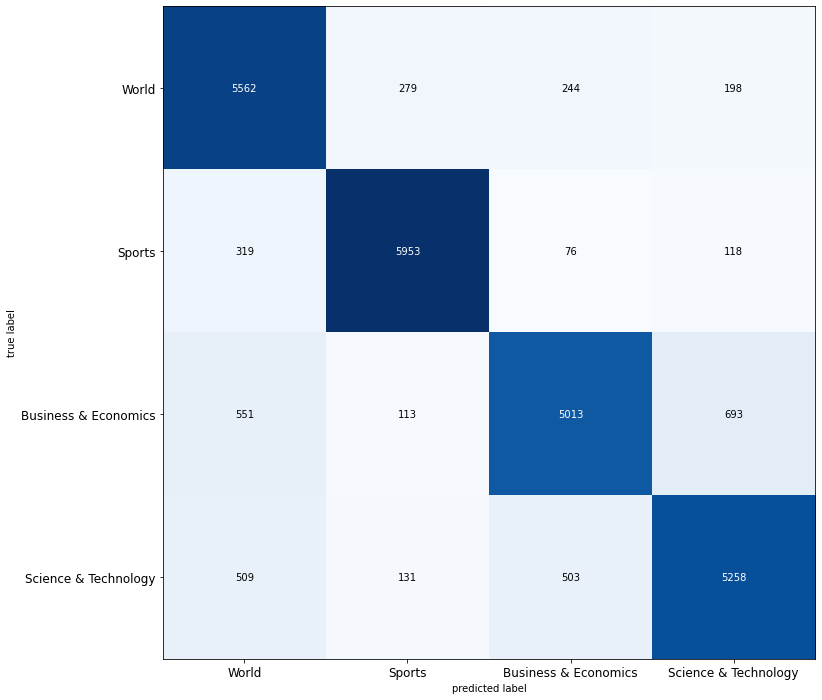

In [29]:
nb_cm = confusion_matrix(y_test, nb_predictions)

plt.figure()

plot_confusion_matrix(nb_cm, figsize = (16,12), hide_ticks = True, cmap = plt.cm.Blues)

plt.xticks(range(4), labels, fontsize = 12)
plt.yticks(range(4), labels, fontsize = 12)

plt.show()

In [30]:
print("Accuracy score: ", accuracy_score(y_test, nb_predictions))
print("Recall score: ", recall_score(y_test, nb_predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, nb_predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, nb_predictions, average = 'weighted'))

Accuracy score:  0.8536833855799373
Recall score:  0.8536833855799373
Precision score:  0.8550413723434154
F1 score:  0.8534317410163467


In [31]:
paragraphs = [
             'T20 ලෝක කුසලානය සඳහා වන ශ්‍රී ලංකා කාන්තා සංචිතය ප්‍රකාශයට පත් කෙරේ',
             'නිදහස් සේවකයාට බදු පැනවීම: බදු අය කරන්නේ කාටද?',
             'වනජීවී වෙළඳාමෙන් වෛරස් අවදානම් පිළිබඳ නව සාක්ෂි',
             'ICC කාන්තා T20 ලෝක කුසලානය 2023 | නිල කණ්ඩායම් අනුග්‍රාහකයා හඳුන්වාදීම සහ ශ්‍රී ලංකා කණ්ඩායමේ ජර්සි එළිදැක්වීම.',
             'නිදහස් දින සැමරුම සම්බන්ධයෙන් ශ්‍රී ලංකා කතෝලික සභාව ජනපතිට බැණ වදියි',
             'IMF ආධාර වැඩසටහන ගැන SJB නායකයාගේ අනතුරු ඇඟවීම',
             '#GalaxyS23 සමඟින් ඔහුගේ වැඩිදියුණු කළ ඡායාරූප පෙන්වයි. Galaxy සමඟ JK හි ඔබ කැමතිම ඡායාරූපය කුමක්ද?',
             'Falcon 9 සිය 200 වැනි සාර්ථක මෙහෙයුම දියත් කළ අතර, තවත් SpaceX Starlink චන්ද්‍රිකා 53ක් අද උදෑසන කක්ෂයට ලබා දුන්නේය.',
             'කැලඹිලි සහිත ආර්ථික කාලවලදී, කොටස් මිලදී ගැනීම සඳහා ආන්තික ණය භාවිතා කිරීම ගැන සැලකිලිමත් වන්න',
             'ඉදිරියේදී පැවැත්වීමට නියමිත බෝඩර් ගවස්කාර් කුසලානයේ විස්තර විචාරකයෙකු ලෙස දිනේෂ් කාර්තික් කටයුතු කරනු ඇත',
             'මෙවර විස්සයි විස්ස ලෝක කුසලාන කාන්තා ක්‍රිකට් තරගාවලියට සහභාගී වන ශ්‍රි ලංකා කාන්තා ක්‍රිකට් කණ්ඩායම අද අලුයම දකුණු අප්‍රිකාව බලා පිටත්ව ගොස් තිබේ.',
             '2023 පළාත් පාලන මැතිවරණයට අදාළව තැපැල් ඡන්දය සලකුණු කිරීමේ දින මැතිවරණ කොමිසම විසින් ප්‍රකාශයට පත්කර තිබේ.',
             'දිවයින හරහා ගමන් කරමින් පැවති පීඩන අවපාතය ඊයේ රාත්‍රියේ අඩු පීඩන කලාපයක් බවට පත්ව දිවයිනෙන් ඉවතට ගමන්කර ඇති බව කාලගුණවිද්‍යා දෙපාර්තමේන්තුව පවසයි.'
             'රජයේ නව බදු ප්‍රතිපත්තියට එරෙහිව කටුනායක බණ්ඩාරනායක ජාත්‍යන්තර ගුවන් තොටුපොළේ වෘත්තිය සමිති නියෝජිතයින් අද (02) දහවල් කෑම පැයේදී විරෝධතාවයේ නිරතවිය.',
             'පැරිස් සමාජයට අයත් ණයහිමි රටවල් ජාත්‍යන්තර මූල්‍ය අරමුදලෙන් ශ්‍රී ලංකාවට ණය පහසුකම ලබාගැනීම සඳහා අදාළ ණය සහතිකය කඩිනමින් ප්‍රකාශයට පත්කිරීමට නියමිත බව රොයිටර්ස් පුවත් සේවය අද (02) අනාවරණ කළේය.',
             'ඇපල් සහ ගූගල් සමාගම් මගින් පාලනය කරන "Play Store"වලින් ටික් ටොක් ඉවත් කරන ලෙසට අමෙරිකානු සෙනෙට් සභිකයෙක් ඉල්ලීමක් කර තිබේ.',
             'කුරුණෑගල මහ නගර සභාවේ නව නගරාධිපති ධුරය සඳහා සමගි ජනබලවේගයේ පක්ෂයේ සුමේද අරුණ ශාන්ත මහතා තේරීපත්ව තිබේ.',
             'තම කණ්ඩායමේ ක්‍රීඩිකාවන් උපරිම දක්ෂතාවල සිටියොත් ලෝකයේ ඕනෑම කණ්ඩායමක් පරාජය කළ හැකි බව ශ්‍රී ලංකා කණ්ඩායමේ නායිකා චමරි අතපත්තු පැවසුවාය.',
             'විදෙස් ජාතික නැවියන් දෙදෙනෙක් හදිසියේ මියයෑමේ සිදුවීමක් පිළිබඳ ගාල්ල වරාය පොලීසියට පැමිණිල්ලක් ලැබී තිබේ.',
             'ලෝක තෙත්බිම් දිනය අදට (02) යෙදී තිබේ.',
             'නිරිතදිග බෙංගාල බොක්ක මුහුදු ප්‍රදේශයේ පැවති පීඩන අවපාතය නැගෙනහිර වෙරළ දෙසින් දිවයිනයට ඇතුළු වී ශ්‍රී ලංකාව හරහා ගමන් කරමින් පවතී.',
             'අද (1) මධ්‍යම රාත්‍රියේ සිට ක්‍රියාත්මක වන පරිදි ඔක්ටේන් 92 වර්ගයේ පෙට්‍රල් ලීටරයක මිල රුපියල් 30කින් ඉහළ දමා ඇති බව ලංකා ඛනිජ තෙල් නීතිගත සංස්ථාව පවසයි.',
             'ජාත්‍යන්තර මූල්‍ය අරමුදලේ මූල්‍ය පහසුකම මෙරටට ලබාගැනීම සඳහා චීනය ලබාදී ඇති ණය සහතිකය ප්‍රමාණවත් නොවන බව අමෙරිකානු රාජ්‍ය දෙපාර්තමේන්තුවේ දේශපාලන කටයුතු පිළිබඳ සහකාර රාජ්‍ය ලේකම් වික්ටෝරියා නූලන්ඩ් මහත්මිය පවසයි.'
            ]

In [32]:
for paragraph in paragraphs:
    transformed_text = count_vector.transform([paragraph])
    predicted_label = nb.predict(transformed_text)

    if predicted_label[0] == 0:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('World', 'blue')))
    elif predicted_label[0] == 1:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Sports', 'blue')))
    elif predicted_label[0] == 2:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Business & Economics', 'blue')))
    elif predicted_label[0] == 3:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Science & Technology', 'blue')))
    else:
        print('Other predicted_label')

T20 ලෝක කුසලානය සඳහා වන ශ්‍රී ලංකා කාන්තා සංචිතය ප්‍රකාශයට පත් කෙරේ - World
නිදහස් සේවකයාට බදු පැනවීම: බදු අය කරන්නේ කාටද? - World
වනජීවී වෙළඳාමෙන් වෛරස් අවදානම් පිළිබඳ නව සාක්ෂි - Science & Technology
ICC කාන්තා T20 ලෝක කුසලානය 2023 | නිල කණ්ඩායම් අනුග්‍රාහකයා හඳුන්වාදීම සහ ශ්‍රී ලංකා කණ්ඩායමේ ජර්සි එළිදැක්වීම. - Sports
නිදහස් දින සැමරුම සම්බන්ධයෙන් ශ්‍රී ලංකා කතෝලික සභාව ජනපතිට බැණ වදියි - World
IMF ආධාර වැඩසටහන ගැන SJB නායකයාගේ අනතුරු ඇඟවීම - World
#GalaxyS23 සමඟින් ඔහුගේ වැඩිදියුණු කළ ඡායාරූප පෙන්වයි. Galaxy සමඟ JK හි ඔබ කැමතිම ඡායාරූපය කුමක්ද? - Sports
Falcon 9 සිය 200 වැනි සාර්ථක මෙහෙයුම දියත් කළ අතර, තවත් SpaceX Starlink චන්ද්‍රිකා 53ක් අද උදෑසන කක්ෂයට ලබා දුන්නේය. - Science & Technology
කැලඹිලි සහිත ආර්ථික කාලවලදී, කොටස් මිලදී ගැනීම සඳහා ආන්තික ණය භාවිතා කිරීම ගැන සැලකිලිමත් වන්න - Business & Economics
ඉදිරියේදී පැවැත්වීමට නියමිත බෝඩර් ගවස්කාර් කුසලානයේ විස්තර විචාරකයෙකු ලෙස දිනේෂ් කාර්තික් කටයුතු කරනු ඇත - Sports
මෙවර විස්සයි විස්ස ලෝක කුසලාන කාන්තා ක්‍රිකට් තරගාවලියට සහභාගී ව

**Logistic Regression**

In [33]:
lr = LogisticRegression(max_iter=2000, solver='sag')

# Wrap the SVM classifier with the OneVsRestClassifier to enable multi-class classification
one_vs_rest_lr = OneVsRestClassifier(lr)

one_vs_rest_lr.fit(training_data, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=2000, solver='sag'))

In [34]:
lr_predictions = one_vs_rest_lr.predict(testing_data)
print(lr_predictions)

[1 1 3 ... 2 2 0]


<Figure size 432x288 with 0 Axes>

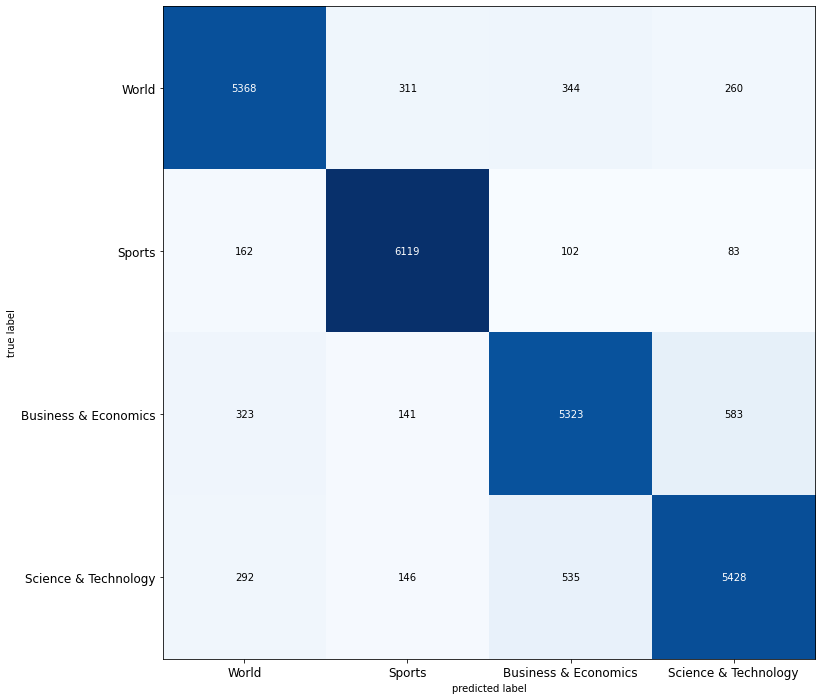

In [35]:
lr_cm = confusion_matrix(y_test, lr_predictions)

plt.figure()

plot_confusion_matrix(lr_cm, figsize = (16,12), hide_ticks = True, cmap = plt.cm.Blues)

plt.xticks(range(4), labels, fontsize = 12)
plt.yticks(range(4), labels, fontsize = 12)

plt.show()

In [36]:
print("Accuracy score: ", accuracy_score(y_test, lr_predictions))
print("Recall score: ", recall_score(y_test, lr_predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, lr_predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, lr_predictions, average = 'weighted'))

Accuracy score:  0.8713949843260188
Recall score:  0.8713949843260188
Precision score:  0.8709160076014645
F1 score:  0.8710353892565149


In [37]:
for paragraph in paragraphs:
    transformed_text = count_vector.transform([paragraph])
    predicted_label = one_vs_rest_lr.predict(transformed_text)

    if predicted_label[0] == 0:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('World', 'blue')))
    elif predicted_label[0] == 1:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Sports', 'blue')))
    elif predicted_label[0] == 2:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Business & Economics', 'blue')))
    elif predicted_label[0] == 3:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Science & Technology', 'blue')))
    else:
        print('Other predicted_label')

T20 ලෝක කුසලානය සඳහා වන ශ්‍රී ලංකා කාන්තා සංචිතය ප්‍රකාශයට පත් කෙරේ - Sports
නිදහස් සේවකයාට බදු පැනවීම: බදු අය කරන්නේ කාටද? - Business & Economics
වනජීවී වෙළඳාමෙන් වෛරස් අවදානම් පිළිබඳ නව සාක්ෂි - Science & Technology
ICC කාන්තා T20 ලෝක කුසලානය 2023 | නිල කණ්ඩායම් අනුග්‍රාහකයා හඳුන්වාදීම සහ ශ්‍රී ලංකා කණ්ඩායමේ ජර්සි එළිදැක්වීම. - Sports
නිදහස් දින සැමරුම සම්බන්ධයෙන් ශ්‍රී ලංකා කතෝලික සභාව ජනපතිට බැණ වදියි - World
IMF ආධාර වැඩසටහන ගැන SJB නායකයාගේ අනතුරු ඇඟවීම - Business & Economics
#GalaxyS23 සමඟින් ඔහුගේ වැඩිදියුණු කළ ඡායාරූප පෙන්වයි. Galaxy සමඟ JK හි ඔබ කැමතිම ඡායාරූපය කුමක්ද? - Business & Economics
Falcon 9 සිය 200 වැනි සාර්ථක මෙහෙයුම දියත් කළ අතර, තවත් SpaceX Starlink චන්ද්‍රිකා 53ක් අද උදෑසන කක්ෂයට ලබා දුන්නේය. - Science & Technology
කැලඹිලි සහිත ආර්ථික කාලවලදී, කොටස් මිලදී ගැනීම සඳහා ආන්තික ණය භාවිතා කිරීම ගැන සැලකිලිමත් වන්න - Business & Economics
ඉදිරියේදී පැවැත්වීමට නියමිත බෝඩර් ගවස්කාර් කුසලානයේ විස්තර විචාරකයෙකු ලෙස දිනේෂ් කාර්තික් කටයුතු කරනු ඇත - Sports
මෙවර විස්සයි විස්ස 

**Random Forest**

In [38]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(training_data, y_train)

RandomForestClassifier(random_state=42)

In [39]:
rf_predictions = rf.predict(testing_data)
print(rf_predictions)

[1 1 3 ... 2 2 0]


<Figure size 432x288 with 0 Axes>

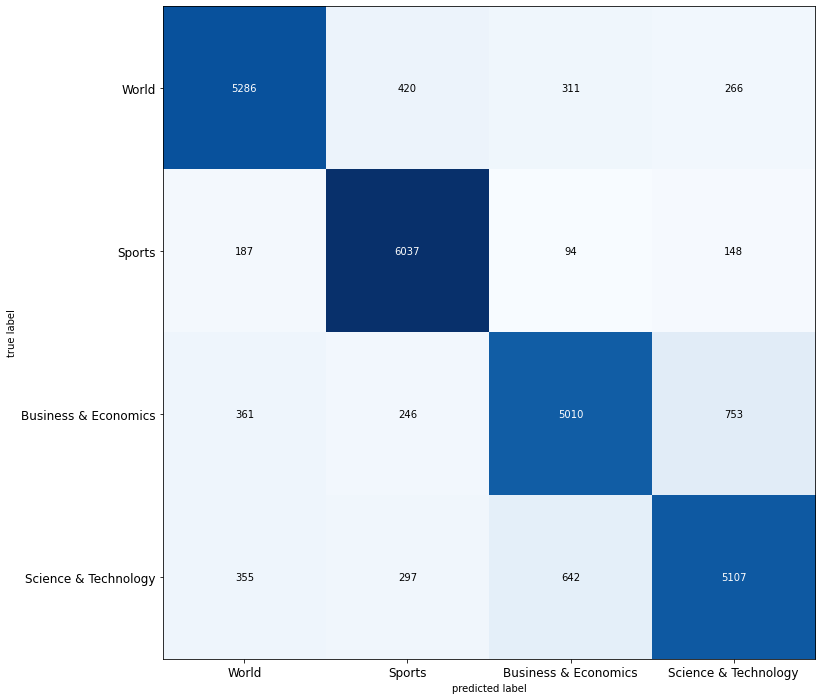

In [40]:
rf_cm = confusion_matrix(y_test, rf_predictions)

plt.figure()

plot_confusion_matrix(rf_cm, figsize = (16,12), hide_ticks = True, cmap = plt.cm.Blues)

plt.xticks(range(4), labels, fontsize = 12)
plt.yticks(range(4), labels, fontsize = 12)

plt.show()

In [41]:
print("Accuracy score: ", accuracy_score(y_test, rf_predictions))
print("Recall score: ", recall_score(y_test, rf_predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, rf_predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, rf_predictions, average = 'weighted'))

Accuracy score:  0.8401253918495298
Recall score:  0.8401253918495298
Precision score:  0.839420882788658
F1 score:  0.8392554154997732


In [42]:
for paragraph in paragraphs:
    transformed_text = count_vector.transform([paragraph])
    predicted_label = rf.predict(transformed_text)

    if predicted_label[0] == 0:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('World', 'blue')))
    elif predicted_label[0] == 1:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Sports', 'blue')))
    elif predicted_label[0] == 2:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Business & Economics', 'blue')))
    elif predicted_label[0] == 3:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Science & Technology', 'blue')))
    else:
        print('Other predicted_label')

T20 ලෝක කුසලානය සඳහා වන ශ්‍රී ලංකා කාන්තා සංචිතය ප්‍රකාශයට පත් කෙරේ - Sports
නිදහස් සේවකයාට බදු පැනවීම: බදු අය කරන්නේ කාටද? - Science & Technology
වනජීවී වෙළඳාමෙන් වෛරස් අවදානම් පිළිබඳ නව සාක්ෂි - Science & Technology
ICC කාන්තා T20 ලෝක කුසලානය 2023 | නිල කණ්ඩායම් අනුග්‍රාහකයා හඳුන්වාදීම සහ ශ්‍රී ලංකා කණ්ඩායමේ ජර්සි එළිදැක්වීම. - Sports
නිදහස් දින සැමරුම සම්බන්ධයෙන් ශ්‍රී ලංකා කතෝලික සභාව ජනපතිට බැණ වදියි - World
IMF ආධාර වැඩසටහන ගැන SJB නායකයාගේ අනතුරු ඇඟවීම - World
#GalaxyS23 සමඟින් ඔහුගේ වැඩිදියුණු කළ ඡායාරූප පෙන්වයි. Galaxy සමඟ JK හි ඔබ කැමතිම ඡායාරූපය කුමක්ද? - Sports
Falcon 9 සිය 200 වැනි සාර්ථක මෙහෙයුම දියත් කළ අතර, තවත් SpaceX Starlink චන්ද්‍රිකා 53ක් අද උදෑසන කක්ෂයට ලබා දුන්නේය. - Science & Technology
කැලඹිලි සහිත ආර්ථික කාලවලදී, කොටස් මිලදී ගැනීම සඳහා ආන්තික ණය භාවිතා කිරීම ගැන සැලකිලිමත් වන්න - Business & Economics
ඉදිරියේදී පැවැත්වීමට නියමිත බෝඩර් ගවස්කාර් කුසලානයේ විස්තර විචාරකයෙකු ලෙස දිනේෂ් කාර්තික් කටයුතු කරනු ඇත - Sports
මෙවර විස්සයි විස්ස ලෝක කුසලාන කාන්තා ක්‍රිකට් තර

**XGBoost in Gradient Boosting algorithms**

In [43]:
xgb = XGBClassifier(
                    objective='multi:softmax',
                    num_class=len(label_encoder.classes_)
                    )

xgb.fit(training_data, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_class=4, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', random_state=0, ...)

In [44]:
xgb_predictions = xgb.predict(testing_data)
print(xgb_predictions)

[1 1 3 ... 2 2 0]


<Figure size 432x288 with 0 Axes>

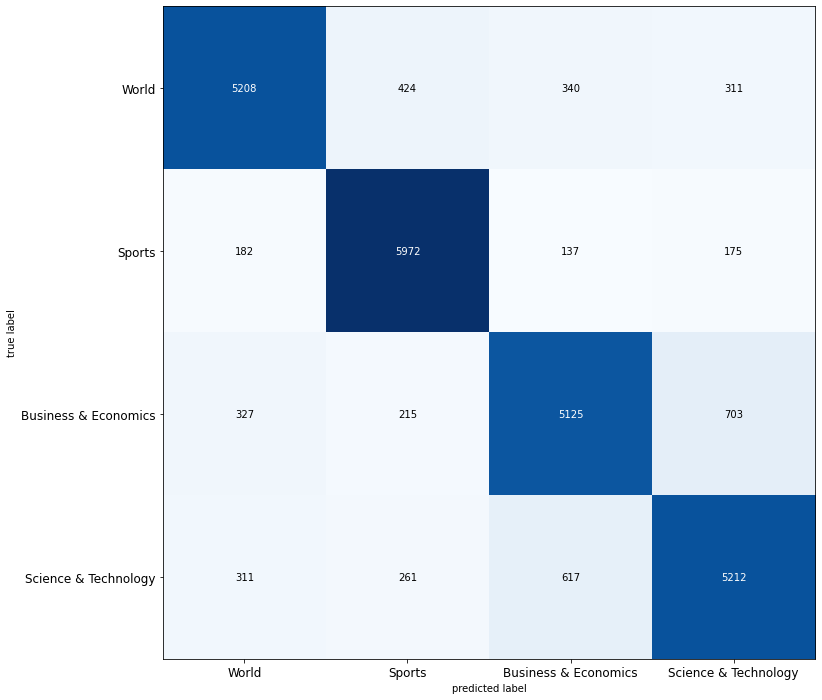

In [45]:
xgb_cm = confusion_matrix(y_test, xgb_predictions)

plt.figure()

plot_confusion_matrix(xgb_cm, figsize = (16,12), hide_ticks = True, cmap = plt.cm.Blues)

plt.xticks(range(4), labels, fontsize = 12)
plt.yticks(range(4), labels, fontsize = 12)

plt.show()

In [46]:
print("Accuracy score: ", accuracy_score(y_test, xgb_predictions))
print("Recall score: ", recall_score(y_test, xgb_predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, xgb_predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, xgb_predictions, average = 'weighted'))

Accuracy score:  0.8431426332288401
Recall score:  0.8431426332288401
Precision score:  0.8428260728770348
F1 score:  0.8426552821401516


In [47]:
for paragraph in paragraphs:
    transformed_text = count_vector.transform([paragraph])
    predicted_label = xgb.predict(transformed_text)

    if predicted_label[0] == 0:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('World', 'blue')))
    elif predicted_label[0] == 1:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Sports', 'blue')))
    elif predicted_label[0] == 2:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Business & Economics', 'blue')))
    elif predicted_label[0] == 3:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Science & Technology', 'blue')))
    else:
        print('Other predicted_label')

T20 ලෝක කුසලානය සඳහා වන ශ්‍රී ලංකා කාන්තා සංචිතය ප්‍රකාශයට පත් කෙරේ - Sports
නිදහස් සේවකයාට බදු පැනවීම: බදු අය කරන්නේ කාටද? - Business & Economics
වනජීවී වෙළඳාමෙන් වෛරස් අවදානම් පිළිබඳ නව සාක්ෂි - Business & Economics
ICC කාන්තා T20 ලෝක කුසලානය 2023 | නිල කණ්ඩායම් අනුග්‍රාහකයා හඳුන්වාදීම සහ ශ්‍රී ලංකා කණ්ඩායමේ ජර්සි එළිදැක්වීම. - Sports
නිදහස් දින සැමරුම සම්බන්ධයෙන් ශ්‍රී ලංකා කතෝලික සභාව ජනපතිට බැණ වදියි - World
IMF ආධාර වැඩසටහන ගැන SJB නායකයාගේ අනතුරු ඇඟවීම - Business & Economics
#GalaxyS23 සමඟින් ඔහුගේ වැඩිදියුණු කළ ඡායාරූප පෙන්වයි. Galaxy සමඟ JK හි ඔබ කැමතිම ඡායාරූපය කුමක්ද? - Sports
Falcon 9 සිය 200 වැනි සාර්ථක මෙහෙයුම දියත් කළ අතර, තවත් SpaceX Starlink චන්ද්‍රිකා 53ක් අද උදෑසන කක්ෂයට ලබා දුන්නේය. - Science & Technology
කැලඹිලි සහිත ආර්ථික කාලවලදී, කොටස් මිලදී ගැනීම සඳහා ආන්තික ණය භාවිතා කිරීම ගැන සැලකිලිමත් වන්න - Business & Economics
ඉදිරියේදී පැවැත්වීමට නියමිත බෝඩර් ගවස්කාර් කුසලානයේ විස්තර විචාරකයෙකු ලෙස දිනේෂ් කාර්තික් කටයුතු කරනු ඇත - Sports
මෙවර විස්සයි විස්ස ලෝක කුසලාන කාන

**LightGBM in Gradient Boosting algorithms**

In [48]:
lgbm = LGBMClassifier(objective='multiclass',
                      num_class=len(label_encoder.classes_)
                     )

training_data = training_data.astype(np.float32)
lgbm.fit(training_data, y_train)

LGBMClassifier(num_class=4, objective='multiclass')

In [49]:
testing_data = testing_data.astype(np.float32)
lgbm_predictions = lgbm.predict(testing_data)
print(lgbm_predictions)

[1 1 3 ... 2 2 0]


<Figure size 432x288 with 0 Axes>

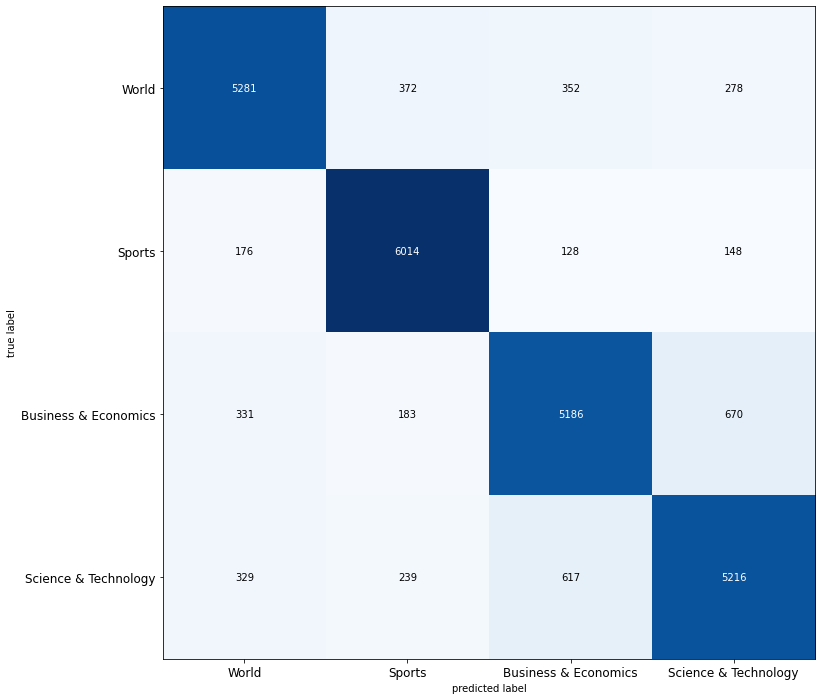

In [50]:
lgbm_cm = confusion_matrix(y_test, lgbm_predictions)

plt.figure()

plot_confusion_matrix(lgbm_cm, figsize = (16,12), hide_ticks = True, cmap = plt.cm.Blues)

plt.xticks(range(4), labels, fontsize = 12)
plt.yticks(range(4), labels, fontsize = 12)

plt.show()

In [51]:
print("Accuracy score: ", accuracy_score(y_test, lgbm_predictions))
print("Recall score: ", recall_score(y_test, lgbm_predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, lgbm_predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, lgbm_predictions, average = 'weighted'))

Accuracy score:  0.8501959247648903
Recall score:  0.8501959247648903
Precision score:  0.8496691179638342
F1 score:  0.8497226659128075


In [52]:
for paragraph in paragraphs:
    transformed_text = count_vector.transform([paragraph])
    transformed_text = transformed_text.astype(np.float32)
    predicted_label = lgbm.predict(transformed_text)

    if predicted_label[0] == 0:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('World', 'blue')))
    elif predicted_label[0] == 1:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Sports', 'blue')))
    elif predicted_label[0] == 2:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Business & Economics', 'blue')))
    elif predicted_label[0] == 3:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Science & Technology', 'blue')))
    else:
        print('Other predicted_label')

T20 ලෝක කුසලානය සඳහා වන ශ්‍රී ලංකා කාන්තා සංචිතය ප්‍රකාශයට පත් කෙරේ - Sports
නිදහස් සේවකයාට බදු පැනවීම: බදු අය කරන්නේ කාටද? - Business & Economics
වනජීවී වෙළඳාමෙන් වෛරස් අවදානම් පිළිබඳ නව සාක්ෂි - Science & Technology
ICC කාන්තා T20 ලෝක කුසලානය 2023 | නිල කණ්ඩායම් අනුග්‍රාහකයා හඳුන්වාදීම සහ ශ්‍රී ලංකා කණ්ඩායමේ ජර්සි එළිදැක්වීම. - Sports
නිදහස් දින සැමරුම සම්බන්ධයෙන් ශ්‍රී ලංකා කතෝලික සභාව ජනපතිට බැණ වදියි - World
IMF ආධාර වැඩසටහන ගැන SJB නායකයාගේ අනතුරු ඇඟවීම - Business & Economics
#GalaxyS23 සමඟින් ඔහුගේ වැඩිදියුණු කළ ඡායාරූප පෙන්වයි. Galaxy සමඟ JK හි ඔබ කැමතිම ඡායාරූපය කුමක්ද? - Sports
Falcon 9 සිය 200 වැනි සාර්ථක මෙහෙයුම දියත් කළ අතර, තවත් SpaceX Starlink චන්ද්‍රිකා 53ක් අද උදෑසන කක්ෂයට ලබා දුන්නේය. - Science & Technology
කැලඹිලි සහිත ආර්ථික කාලවලදී, කොටස් මිලදී ගැනීම සඳහා ආන්තික ණය භාවිතා කිරීම ගැන සැලකිලිමත් වන්න - Business & Economics
ඉදිරියේදී පැවැත්වීමට නියමිත බෝඩර් ගවස්කාර් කුසලානයේ විස්තර විචාරකයෙකු ලෙස දිනේෂ් කාර්තික් කටයුතු කරනු ඇත - Sports
මෙවර විස්සයි විස්ස ලෝක කුසලාන කාන

**SVM**

In [53]:
# svm = SVC(kernel='linear')

# # Wrap the SVM classifier with the OneVsRestClassifier to enable multi-class classification
# one_vs_rest_svm = OneVsRestClassifier(svm)

# one_vs_rest_svm.fit(training_data, y_train)

In [54]:
# svm_predictions = one_vs_rest_svm.predict(testing_data)
# print(svm_predictions)

In [55]:
# svm_cm = confusion_matrix(y_test, svm_predictions)

# plt.figure()

# plot_confusion_matrix(svm_cm, figsize = (16,12), hide_ticks = True, cmap = plt.cm.Blues)

# plt.xticks(range(4), labels, fontsize = 12)
# plt.yticks(range(4), labels, fontsize = 12)

# plt.show()

In [56]:
# print("Accuracy score: ", accuracy_score(y_test, svm_predictions))
# print("Recall score: ", recall_score(y_test, svm_predictions, average = 'weighted'))
# print("Precision score: ", precision_score(y_test, svm_predictions, average = 'weighted'))
# print("F1 score: ", f1_score(y_test, svm_predictions, average = 'weighted'))

In [57]:
# for paragraph in paragraphs:
#     transformed_text = count_vector.transform([paragraph])
#     predicted_label = one_vs_rest_svm.predict(transformed_text)

#     if predicted_label[0] == 0:
#         print('{} - {}'.format(colored(paragraph, 'yellow'), colored('World', 'blue')))
#     elif predicted_label[0] == 1:
#         print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Sports', 'blue')))
#     elif predicted_label[0] == 2:
#         print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Business & Economics', 'blue')))
#     elif predicted_label[0] == 3:
#         print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Science & Technology', 'blue')))
#     else:
#         print('Other predicted_label')